In [1]:
!pip install textblob seaborn
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
file_path = 'sentimentdataset (1).csv'  # Replace with the path to your dataset
dataset = pd.read_csv(file_path)
dataset


,s.no,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,732,Collaborating on a science project that receiv...,Happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,733,Attending a surprise birthday party organized ...,Happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,734,Successfully fundraising for a school charity ...,Happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,735,"Participating in a multicultural festival, cel...",Happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20


In [6]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = text.lower()                 # Convert to lowercase
    return text

dataset['Cleaned_Text'] = dataset['Text'].apply(clean_text)
dataset


,s.no,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text
0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,enjoying a beautiful day at the park ...
1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,traffic was terrible this morning ...
2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,just finished an amazing workout
3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,excited about the upcoming weekend getaway ...
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,trying out a new recipe for dinner tonight ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,732,Collaborating on a science project that receiv...,Happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18,collaborating on a science project that receiv...
728,733,Attending a surprise birthday party organized ...,Happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14,attending a surprise birthday party organized ...
729,734,Successfully fundraising for a school charity ...,Happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17,successfully fundraising for a school charity ...
730,735,"Participating in a multicultural festival, cel...",Happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20,participating in a multicultural festival cele...


In [7]:
def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

dataset['Calculated_Sentiment'] = dataset['Cleaned_Text'].apply(analyze_sentiment)
dataset


,s.no,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text,Calculated_Sentiment
0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,enjoying a beautiful day at the park ...,Positive
1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,traffic was terrible this morning ...,Negative
2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,just finished an amazing workout,Positive
3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,excited about the upcoming weekend getaway ...,Positive
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,trying out a new recipe for dinner tonight ...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,732,Collaborating on a science project that receiv...,Happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18,collaborating on a science project that receiv...,Positive
728,733,Attending a surprise birthday party organized ...,Happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14,attending a surprise birthday party organized ...,Positive
729,734,Successfully fundraising for a school charity ...,Happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17,successfully fundraising for a school charity ...,Positive
730,735,"Participating in a multicultural festival, cel...",Happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20,participating in a multicultural festival cele...,Positive


In [9]:
labeled_distribution = dataset['Sentiment'].value_counts()
calculated_distribution = dataset['Calculated_Sentiment'].value_counts()

# Align categories to avoid mismatches
common_categories = set(labeled_distribution.index).union(set(calculated_distribution.index))
labeled_distribution = labeled_distribution.reindex(common_categories, fill_value=0)
calculated_distribution = calculated_distribution.reindex(common_categories, fill_value=0)


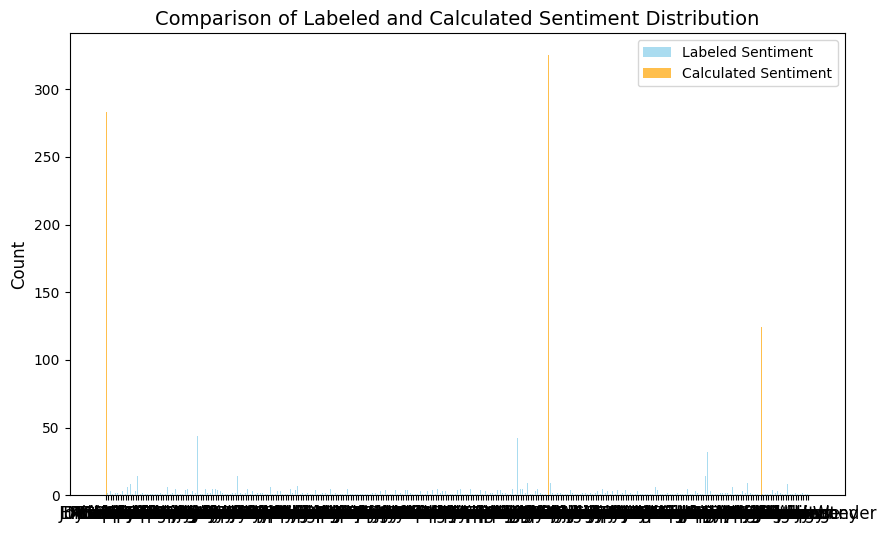

In [10]:
plt.figure(figsize=(10, 6))
x = range(len(common_categories))
width = 0.4

plt.bar(x, labeled_distribution.values, width=width, label="Labeled Sentiment", alpha=0.7, color='skyblue')
plt.bar([i + width for i in x], calculated_distribution.values, width=width, label="Calculated Sentiment", alpha=0.7, color='orange')

plt.xticks([i + width/2 for i in x], common_categories, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Comparison of Labeled and Calculated Sentiment Distribution", fontsize=14)
plt.legend()
plt.show()

C:\Users\Nitu Singh\AppData\Local\Temp\ipykernel_15088\2919704144.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])


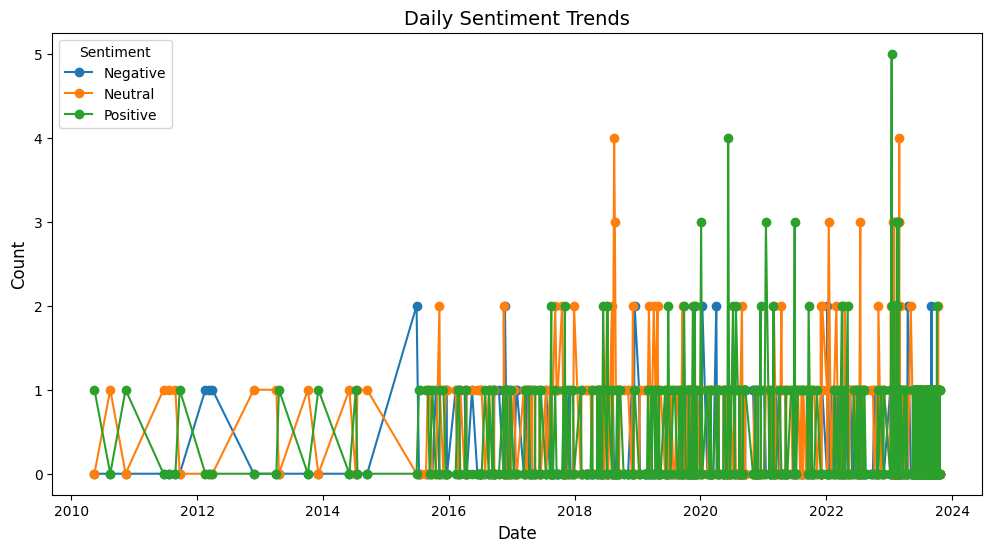

In [11]:
# Ensure 'Timestamp' is in datetime format
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

# Aggregate by day
daily_sentiment = dataset.groupby(dataset['Timestamp'].dt.date)['Calculated_Sentiment'].value_counts().unstack(fill_value=0)

# Plot sentiment trends
daily_sentiment.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Daily Sentiment Trends", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sentiment", fontsize=10)
plt.show()


In [12]:
# Ensure 'Timestamp' is in datetime format
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

# Extract Year and Month
dataset['Year'] = dataset['Timestamp'].dt.year
dataset['Month'] = dataset['Timestamp'].dt.month

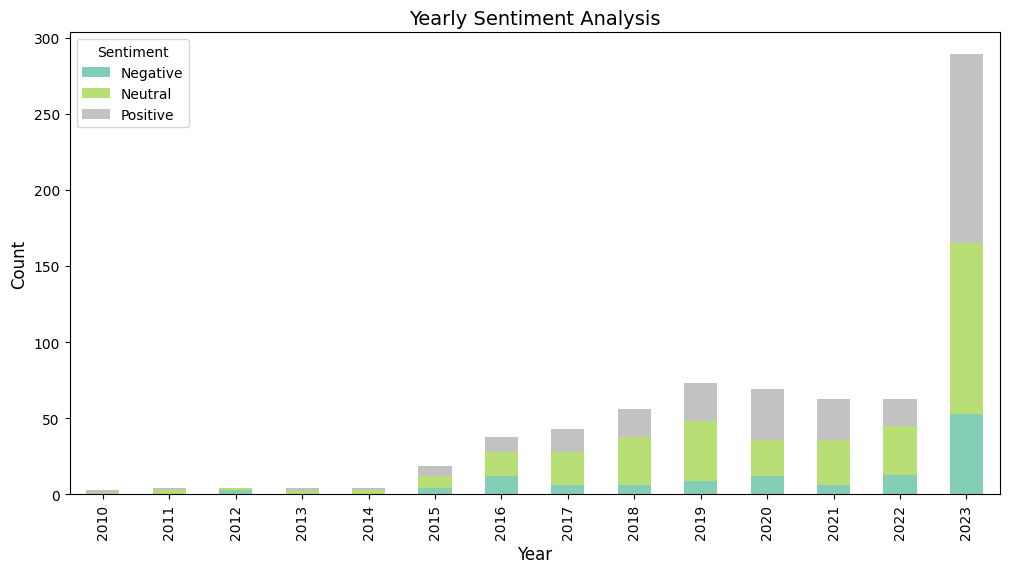

In [13]:
# Aggregate sentiments by year
yearly_sentiment = dataset.groupby('Year')['Calculated_Sentiment'].value_counts().unstack(fill_value=0)

# Plot yearly sentiment trends
yearly_sentiment.plot(kind='bar', figsize=(12, 6), stacked=True, alpha=0.8, colormap='Set2')
plt.title("Yearly Sentiment Analysis", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sentiment", fontsize=10)
plt.show()


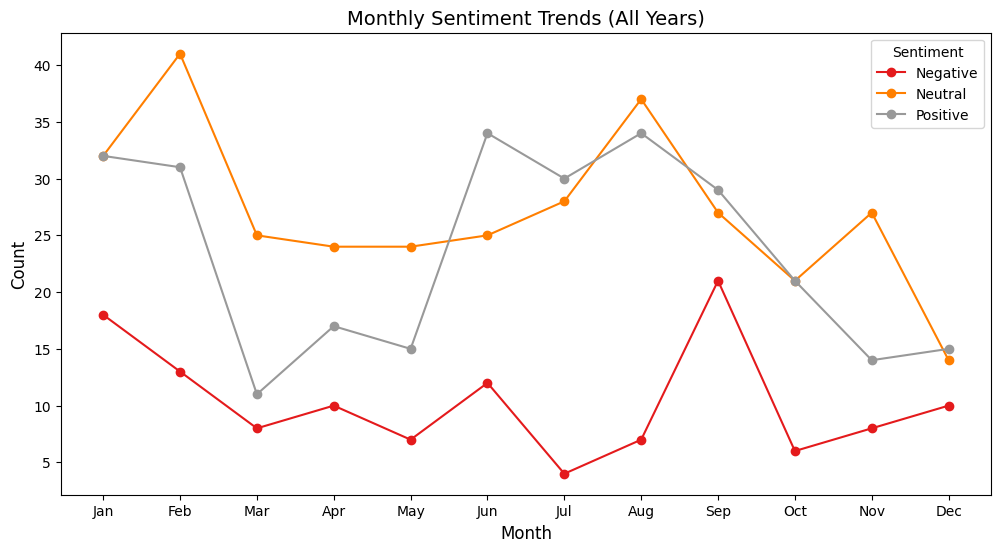

In [14]:
# Aggregate sentiments by month
monthly_sentiment = dataset.groupby('Month')['Calculated_Sentiment'].value_counts().unstack(fill_value=0)

# Plot monthly sentiment trends
monthly_sentiment.plot(kind='line', figsize=(12, 6), marker='o', colormap='Set1')
plt.title("Monthly Sentiment Trends (All Years)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Sentiment", fontsize=10)
plt.show()

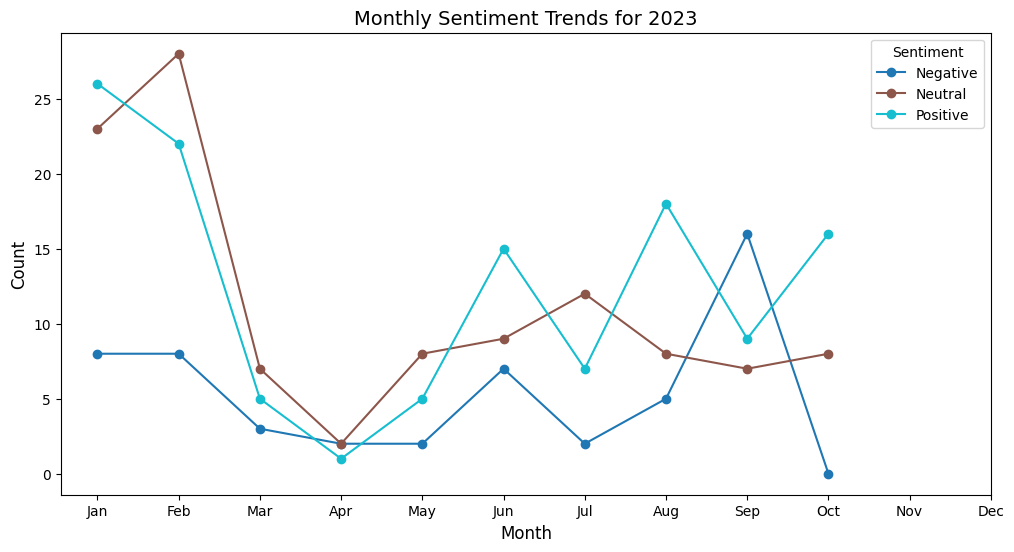

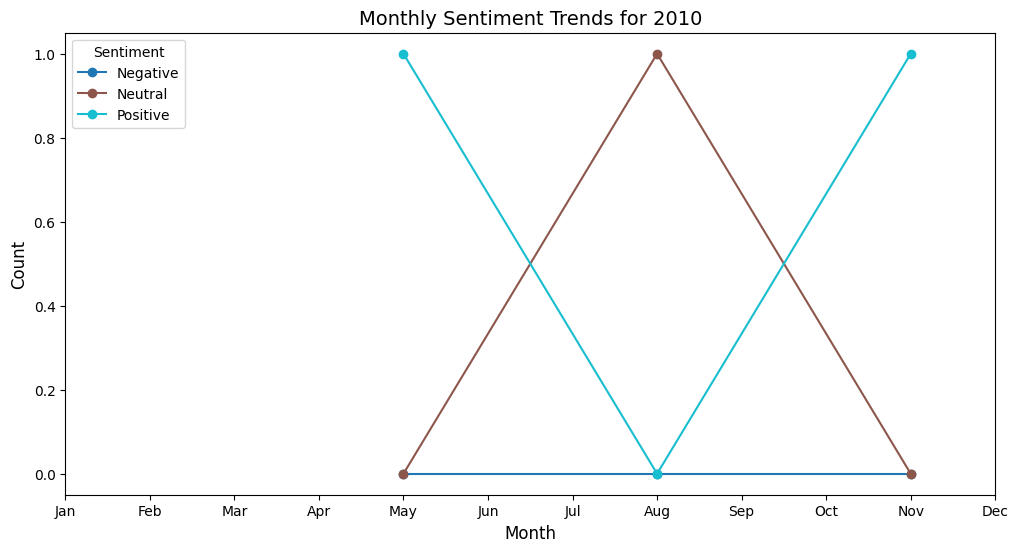

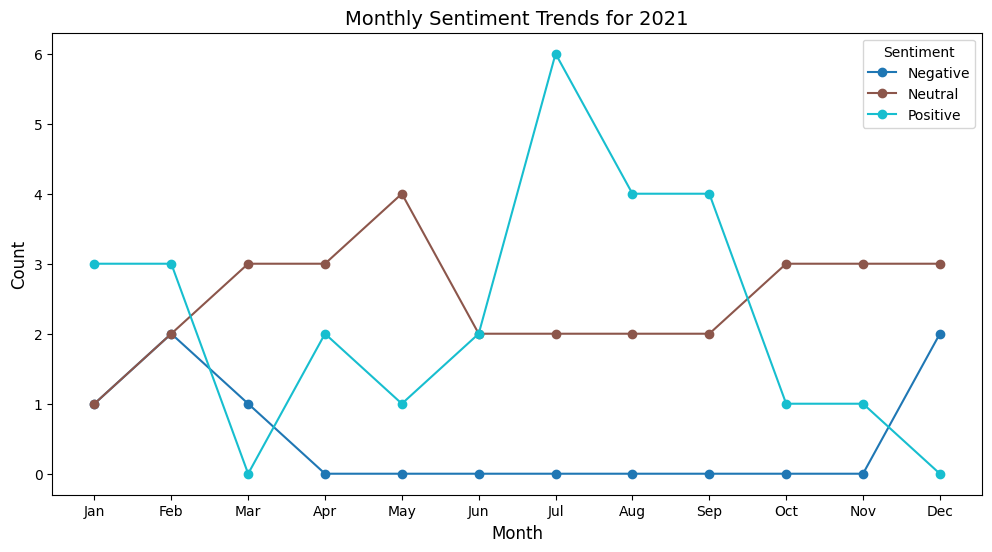

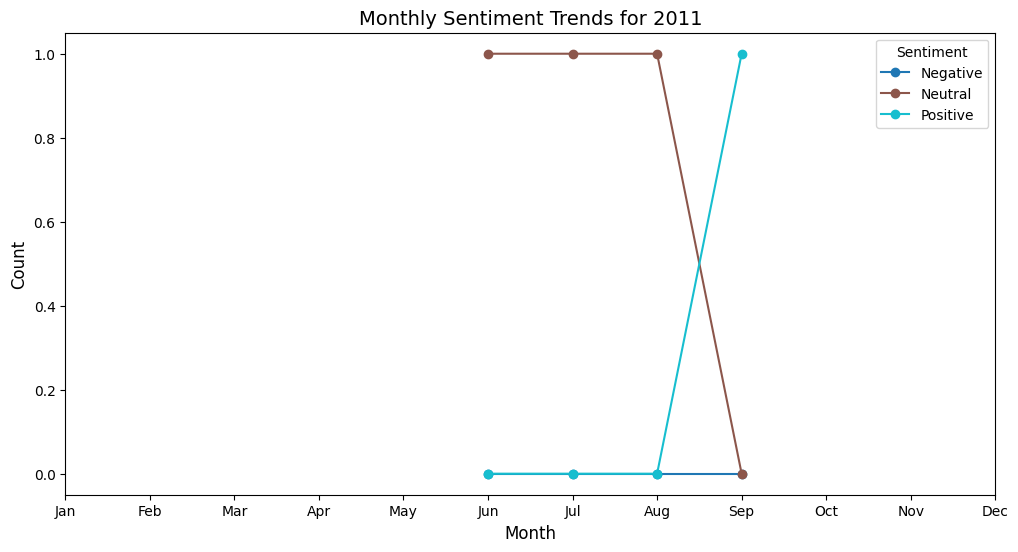

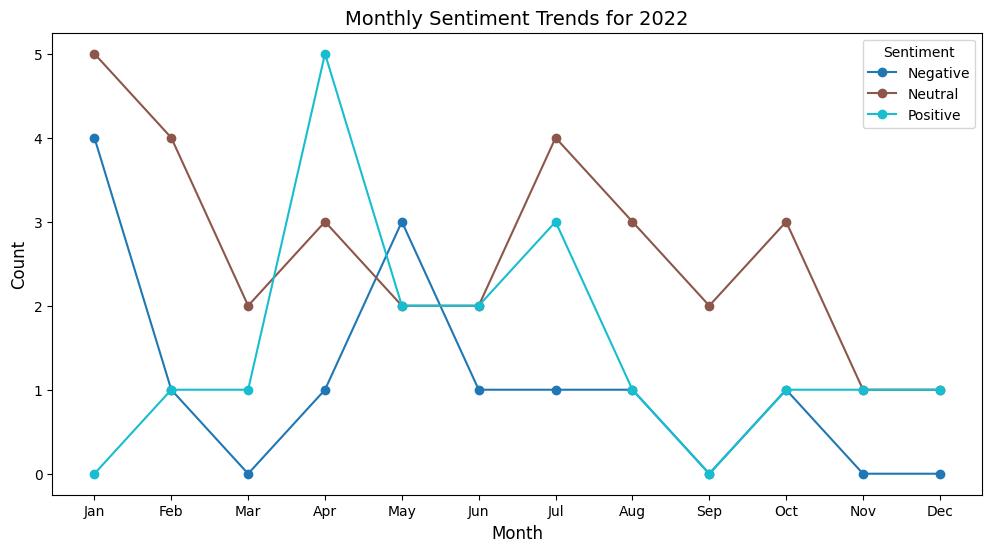

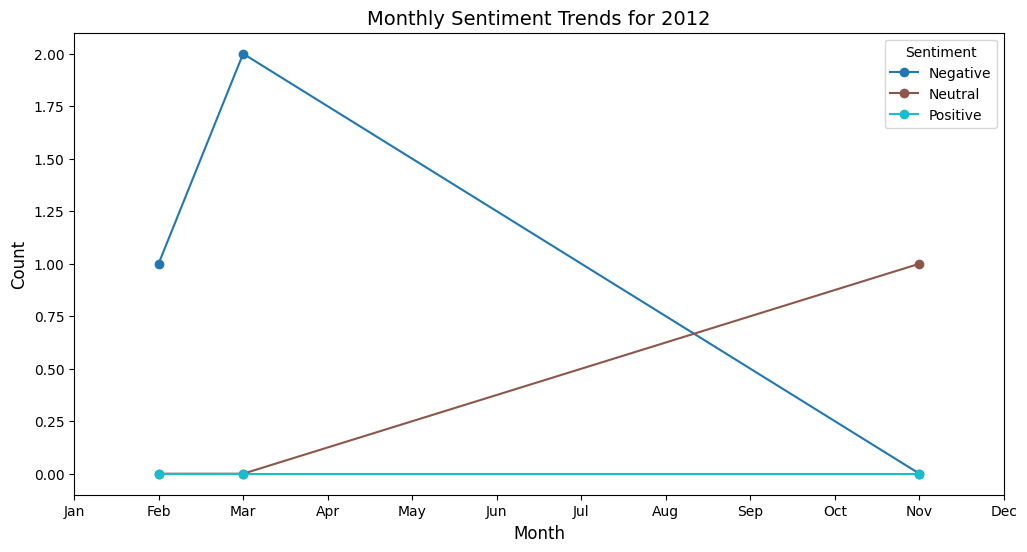

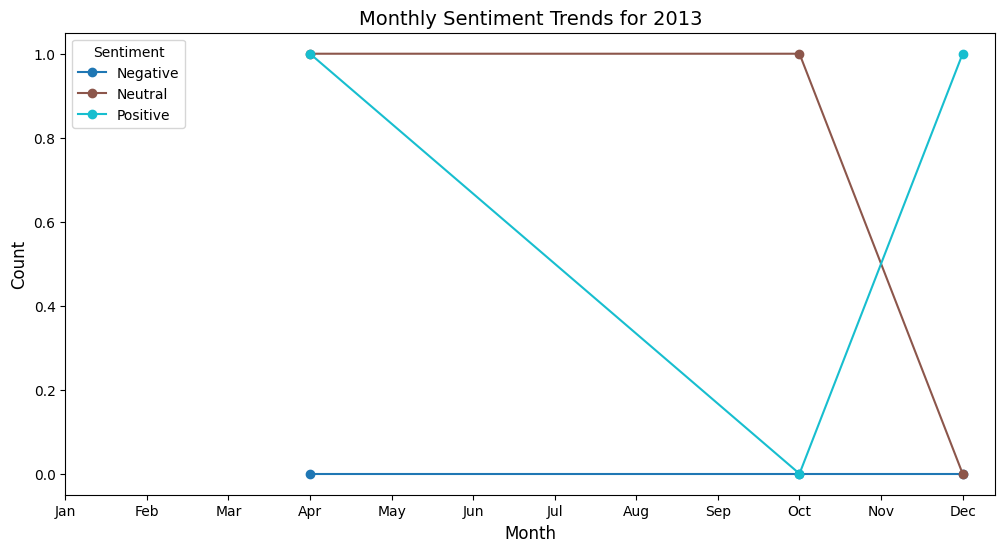

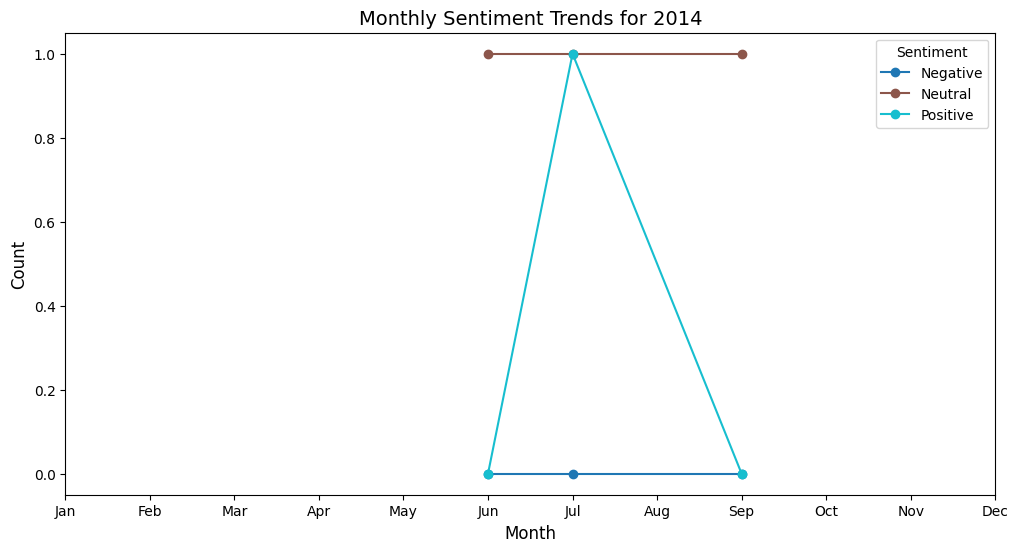

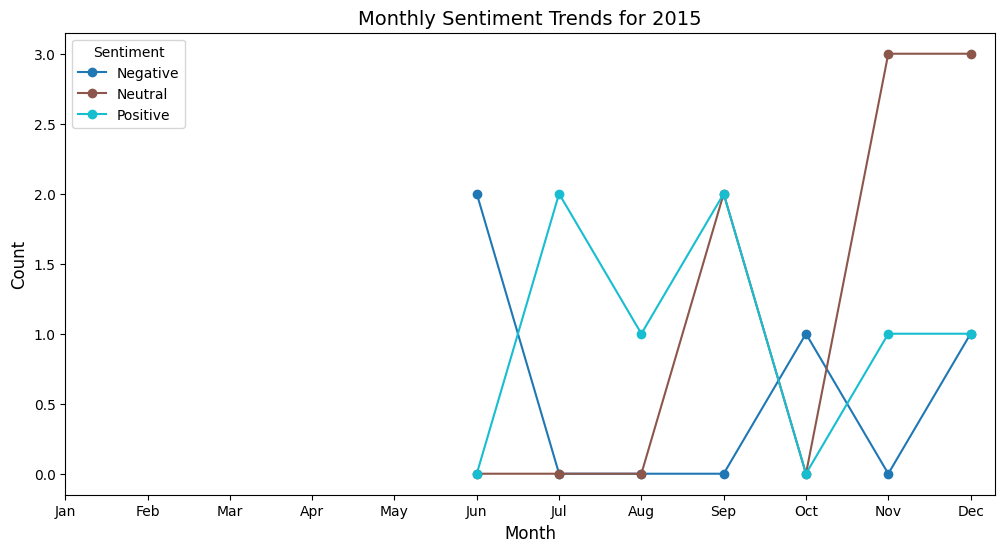

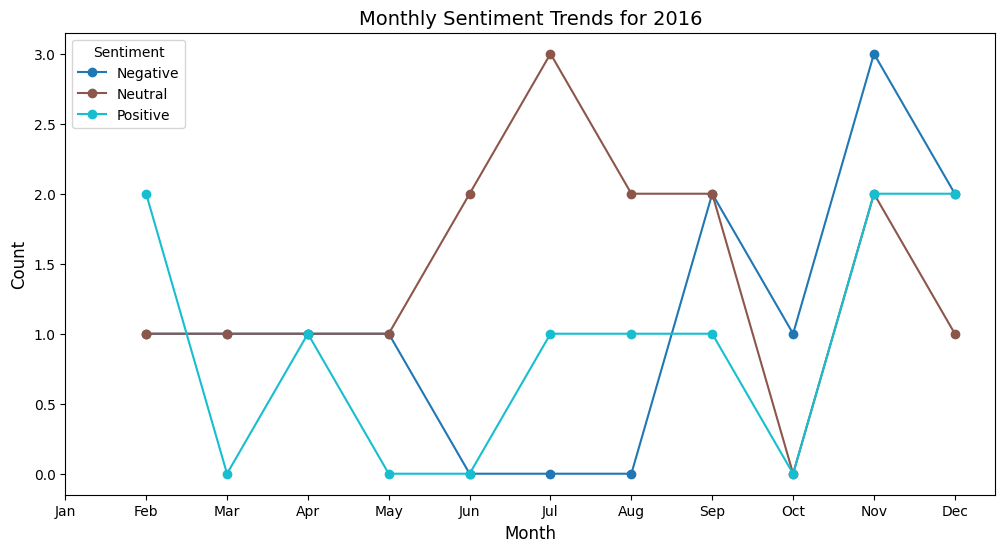

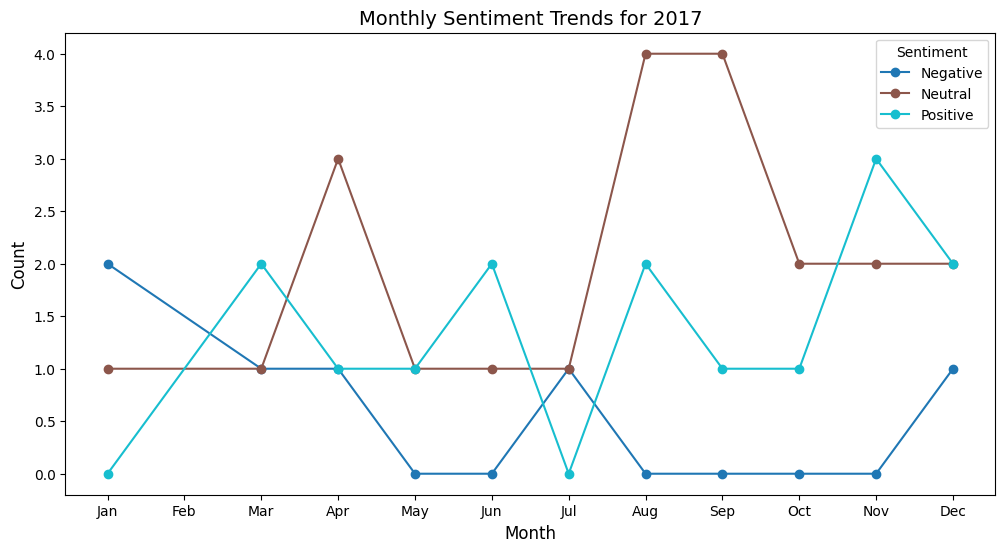

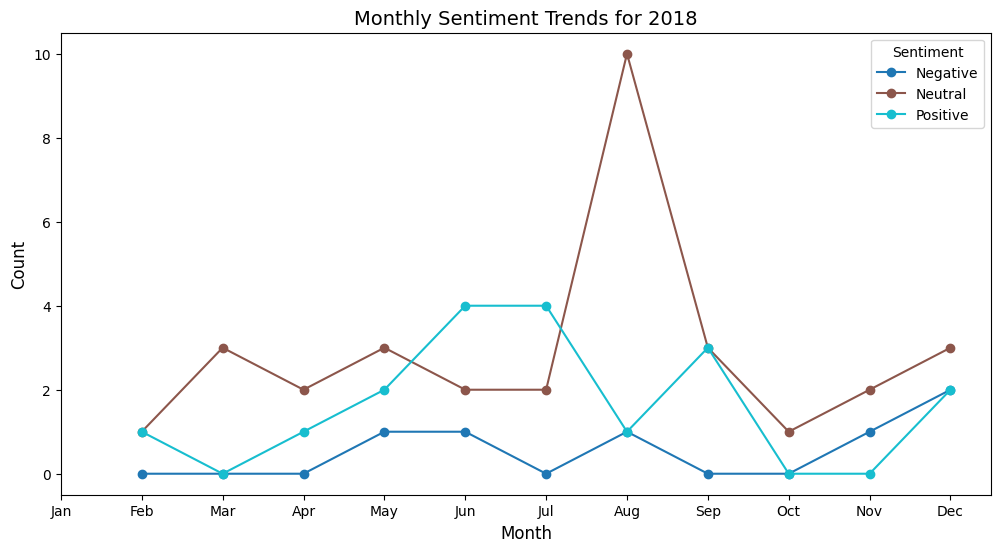

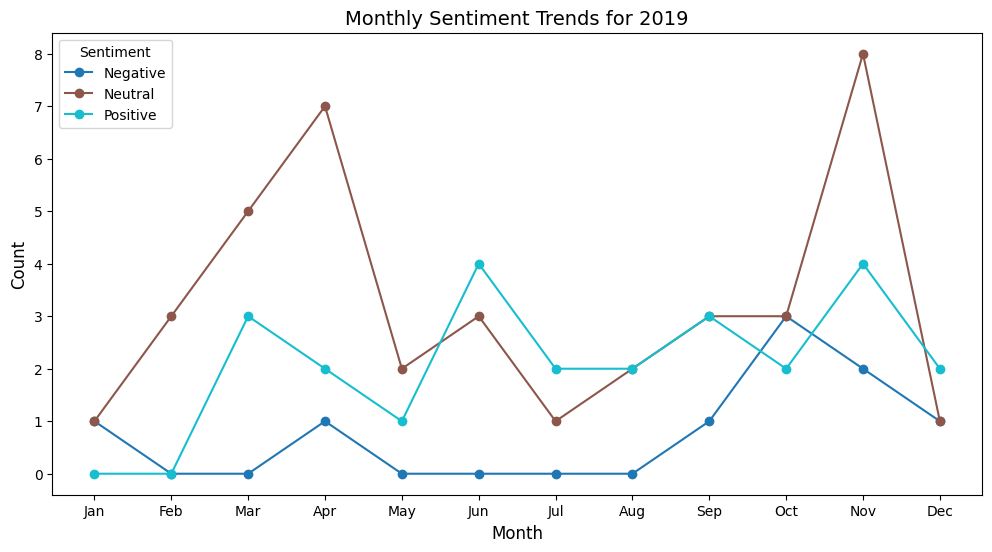

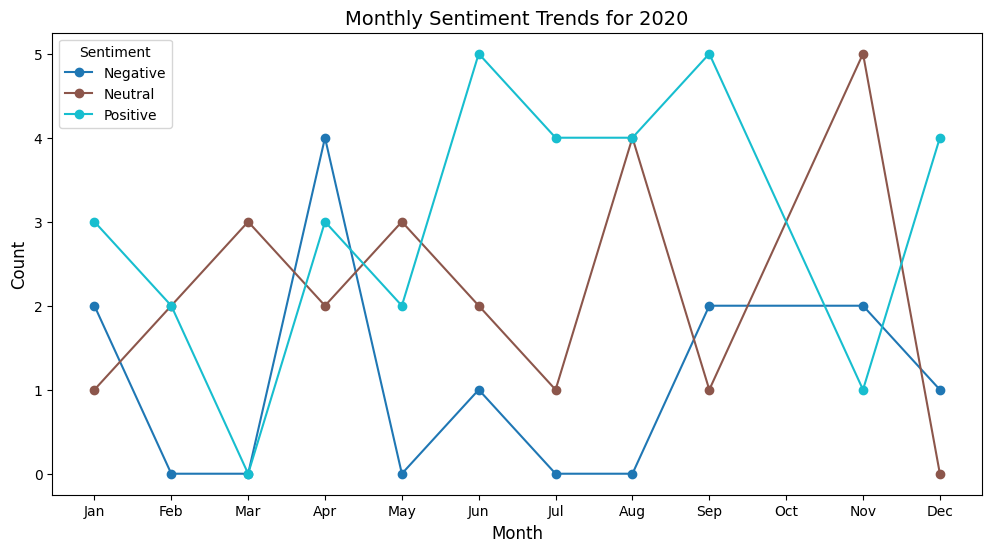

In [15]:
# Aggregate sentiments by year and month
monthly_yearly_sentiment = dataset.groupby(['Year', 'Month'])['Calculated_Sentiment'].value_counts().unstack(fill_value=0)

# Plot monthly sentiment trends for each year
for year in dataset['Year'].unique():
    sentiment_data = monthly_yearly_sentiment.loc[year]
    sentiment_data.plot(kind='line', figsize=(12, 6), marker='o', colormap='tab10')
    plt.title(f"Monthly Sentiment Trends for {year}", fontsize=14)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.legend(title="Sentiment", fontsize=10)
    plt.show()
    

In [16]:
# Aggregate positive and negative sentiments by platform
platform_sentiment = dataset.groupby('Platform')['Calculated_Sentiment'].value_counts().unstack(fill_value=0)

# Ensure the columns include only Positive and Negative sentiments
platform_sentiment = platform_sentiment[['Positive', 'Negative']]

# Add a new column for the positive-to-negative sentiment ratio
platform_sentiment['Pos_Neg_Ratio'] = platform_sentiment['Positive'] / (platform_sentiment['Negative'] + 1)

# Sort platforms based on the positive-to-negative sentiment ratio
platform_sentiment_sorted = platform_sentiment.sort_values(by='Pos_Neg_Ratio', ascending=False)

In [17]:
# Top 3 platforms with the highest positive-to-negative sentiment ratio
top_platforms = platform_sentiment_sorted.head(3)

# Bottom 3 platforms with the lowest positive-to-negative sentiment ratio
bottom_platforms = platform_sentiment_sorted.tail(3)


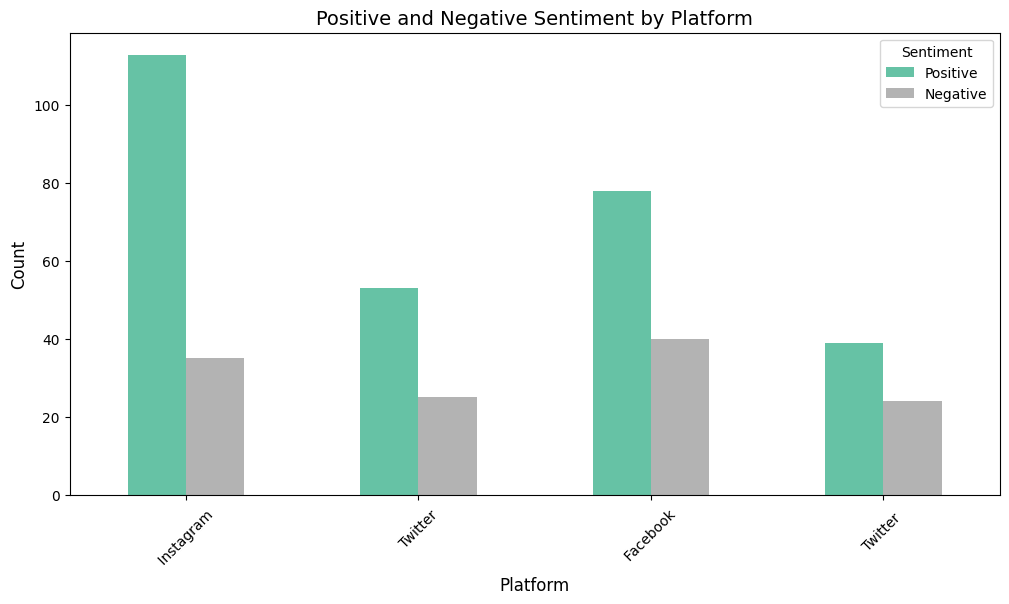

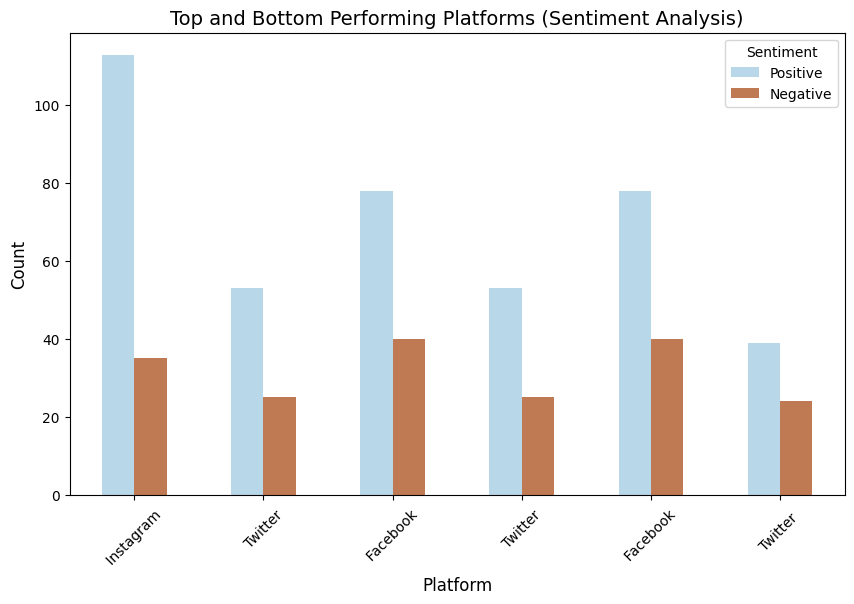

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for platform sentiment distribution
platform_sentiment_sorted[['Positive', 'Negative']].plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Positive and Negative Sentiment by Platform", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", fontsize=10)
plt.show()

# Highlight top and bottom platforms
top_bottom = pd.concat([top_platforms, bottom_platforms])
top_bottom[['Positive', 'Negative']].plot(kind='bar', figsize=(10, 6), colormap='Paired', alpha=0.8)
plt.title("Top and Bottom Performing Platforms (Sentiment Analysis)", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", fontsize=10)
plt.show()


In [19]:
print("Top Performing Platforms (Highest Positive-to-Negative Ratio):")
print(top_platforms[['Positive', 'Negative', 'Pos_Neg_Ratio']])

print("\nBottom Performing Platforms (Lowest Positive-to-Negative Ratio):")
print(bottom_platforms[['Positive', 'Negative', 'Pos_Neg_Ratio']])


Top Performing Platforms (Highest Positive-to-Negative Ratio):
Calculated_Sentiment  Positive  Negative  Pos_Neg_Ratio
Platform                                               
Instagram                  113        35       3.138889
Twitter                     53        25       2.038462
Facebook                    78        40       1.902439

Bottom Performing Platforms (Lowest Positive-to-Negative Ratio):
Calculated_Sentiment  Positive  Negative  Pos_Neg_Ratio
Platform                                               
Twitter                     53        25       2.038462
Facebook                    78        40       1.902439
Twitter                     39        24       1.560000
